# Moving Averages

One simple way to predict whether the next period's price is to compare a short-term moving average to a longer-term moving average. We can use this as a baseline, and then use other phenomena (large spreads, trend reversals, support/resistance, etc.) to improve our prediction when they apply. 

## Imports

In [7]:
import os

import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [8]:
df = pd.read_csv(os.path.join('..', 'data', 'train.csv'))
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,1.0
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,0.0
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,0.0
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,0.0
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,0.0


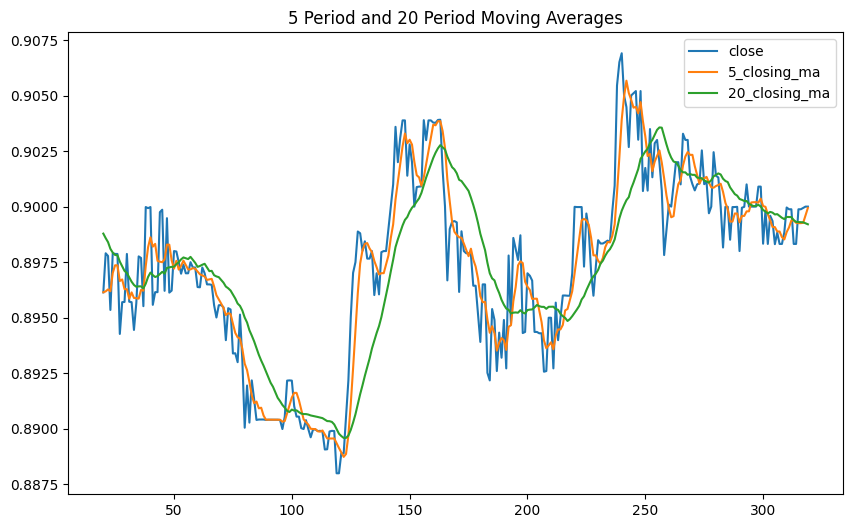

In [10]:
df['5_closing_ma'] = df['close'].rolling(window=5).mean()
df['20_closing_ma'] = df['close'].rolling(window=20).mean()

df.iloc[20:320].plot(y=['close', '5_closing_ma', '20_closing_ma'], figsize=(10, 6))
plt.title('5 Period and 20 Period Moving Averages')
plt.show()

In [20]:
df.dropna(inplace=True)
df['prediction'] = df['5_closing_ma'] < df['20_closing_ma'].astype(int)

df['error'] = df['prediction'] != df['target'] # False if prediction is correct

print(f"Accuracy: {(1 - df['error'].mean())*100:.2f}%")

Accuracy: 52.42%


My hypothesis here is that when the short-term MA is above long-term, we expect a few large upward moves along with many smaller downward moves. Since we are only trying to predict direction and not magnitude, it actually makes sense to predict downward moves in this period (even though this basically disqualifies a trading strategy based on this prediction).

A preliminary accuracy of 52% is not bad for a strategy this simple, and we can augment it a lot by adding other factors.